### **Understand ``BOOTSTRAP`` Simulation using examples** 

##### **The objective of this notebook is to work with bootstrap simulations using some examples and build the understanding of where and how to use it.**
---

##### **Notebook Contents**

1. [Notes and Cheatsheets](#Notes_Cheatsheets)
2. [Import required libraries](#Import_packages)
3. [Use-case : I : Confidence Interval using Z-distn](#CASE:I)
4. [Use-case : II : Confidence Interval using C.L.T](#CASE:II)
    1. [Large Sample Size](#Large_Sample_Size)
    2. [Small Sample Size](#Small_Sample_Size)
5. [Use-case : III : Confidence Interval using Bootstrap Sampling](#CASE:III)
6. [Models Comparison](#Models_Comparison)
---

#### **Notes_Cheatsheets**

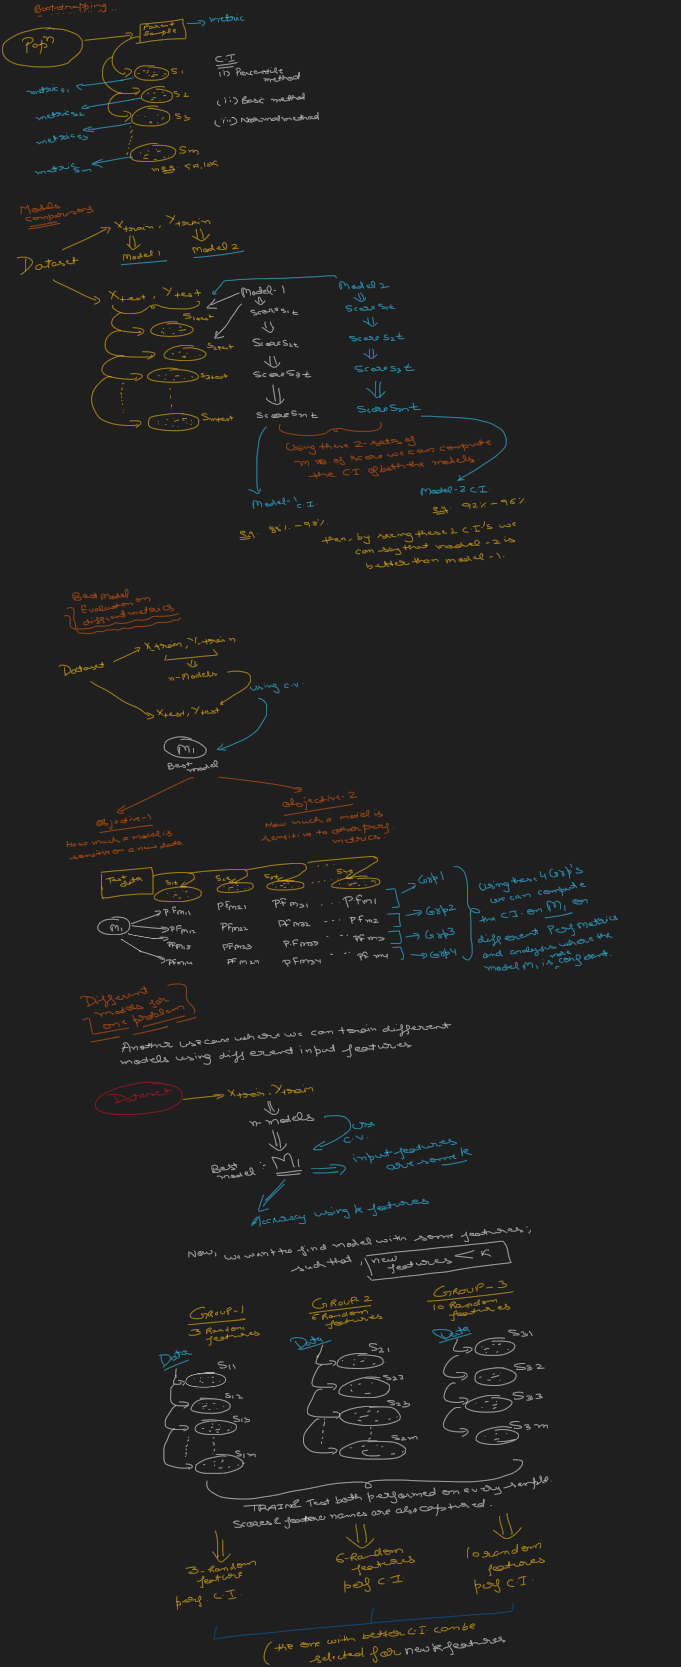

In [88]:
from IPython.display import Image

Image("Handwritten_Notes/Bootstrapping_usecases.png",width=1000,height=1000)

#### **Import_packages**

In [2]:
import os
import sys
import logging

logging.basicConfig(filename="Bootstrapping_Logs.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Start packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from termcolor import colored    
    from statsmodels.graphics.gofplots import qqplot
except ModuleNotFoundError as import_error:
    logging.error(msg=(import_error.__class__.__name__ + " :: {} not found".format(import_error.name)))

%matplotlib inline

#### **Population_Data**

In [3]:
# Setting the seed for random numbers for results reproducibility
np.random.seed(44)

# Generating random data for population
pop_scores = np.random.lognormal(mean=3, sigma=1, size=100000)

In [4]:
pop_scores[0:100]

array([  9.48190535,  74.91523877,  69.83532906,   4.03531457,
         4.6267576 ,   3.61441328, 128.86736428,  21.92413262,
        19.06163743,  35.0043254 ,   7.66447722,  16.77145836,
         6.15085345,  36.79808923,   7.75509035,  28.8138467 ,
        58.00970105,  17.86507736,  45.86328246,   5.99056929,
         6.10737089,  25.02491231,  16.23356269,   4.89640301,
        12.39160199,  66.80394144,   9.91646957,  20.59773987,
        13.58371767,  24.36479161,  28.48253043,  36.27716145,
        33.79827852,  45.84299422,  30.75964203,  24.42580183,
        12.01177984,   0.92896073,  13.52907306,   9.06663159,
         9.94230105,   3.53462539,  42.5554639 ,   3.1144322 ,
        30.52393056,  15.87373986,  30.94177381,  47.95638396,
       149.69833766,  79.1837347 ,  57.89308148,  85.22864312,
        21.09051241,  21.98432106,  12.42540525,  27.13061339,
        61.12859917,  19.70130651,  20.06932242,  10.60652912,
        98.95679746,  20.46288969,  35.21276539,  16.46

In [5]:
## Population Score mean
np.mean(pop_scores)

33.06191014559588

In [6]:
## Population Score Variance
np.var(pop_scores,ddof=0)

1819.8229254277492

In [7]:
## Population Score Std Dev
np.std(pop_scores,ddof=0)

42.65938261892393

### **CASE:I**
#### **Assuming it a normal distribution**

##### **Here, I'm making a big assumption that the population belongs to the normal distribution thus using the normal distribution to calculate the standard error and confidence interval.**

In [8]:
## Generating the parent sample
sample1 = np.random.choice(a=pop_scores,size=50,replace=True)
sample1.size

50

In [9]:
## Parent Sample Scores Mean
np.mean(sample1)

29.063050440702337

In [10]:
## Parent Sample Score Var
np.var(sample1,ddof=1)

1099.7079671982667

In [11]:
## Parent Sample Score Std Dev
samp1_std = np.std(sample1,ddof=1)
samp1_std

33.16184505117691

In [12]:
## Standard Error
import scipy
z_alpha_by_2 = scipy.stats.norm.ppf(0.95)
print("Value of Z at 95% LOC is : {:.3f}\n".format(z_alpha_by_2))

samp1_std_err = samp1_std / (np.sqrt(sample1.size))
print("Value of Standard Error is : {:.3f}\n".format(samp1_std_err))

margin_of_error = z_alpha_by_2 * samp1_std_err
print("Margin of Error is : {:.3f}".format(margin_of_error))

Value of Z at 95% LOC is : 1.645

Value of Standard Error is : 4.690

Margin of Error is : 7.714


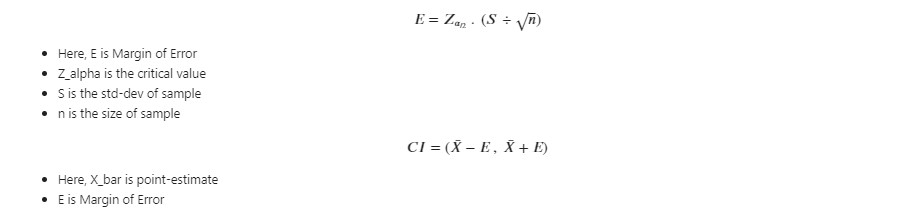

In [13]:
from IPython.display import Image

Image("Handwritten_Notes/Z_ci_formula.jpg",width=1000,height=1000)

In [14]:
ci = (np.round(sample1.mean() - margin_of_error,3), np.round(sample1.mean() + margin_of_error,3))
print("Confidence Interval is : Lower Interval - {}, Mean - {}, Upper Interval - {}".format(ci[0],sample1.mean(),ci[1]))

Confidence Interval is : Lower Interval - 21.349, Mean - 29.063050440702337, Upper Interval - 36.777


##### Thus, here we are concluding that the population mean will fall between 187 and 239 with a 95% Level of Confidence.

### **CASE:II**
#### **Using CLT without assuming it a normal distribution**

##### **The power of CLT is that it can be applied to any distribution but its one of major limitations is that we need to cover the entire population in our samples which is not possible in real-life.**

#### **Large_Sample_Size**

In [15]:
sample_size = 50
number_of_samples = pop_scores.size/sample_size
print("Number of samples to be withdrawn {} and Samples Size {}".format(number_of_samples,sample_size))

Number of samples to be withdrawn 2000.0 and Samples Size 50


In [16]:
def clt(pop_data,num_samples,samp_size):
    """
    Description: This function is created for performing the central limit theorem.
    
    Input Parameters: It accepts below inputs:
        1. pop_data: `numpy.array`
            Population data or array
        2. num_samples: `int`
            Number of samples to be taken from population
        3. samp_size: `int`
            Sample size
    
    Return: It returns the following list containers:
        1. sampling_distn: `list`
            Sampling distribution of population
        
        2. sampling_distn_sample_means: `list`
            Sampling distribution of sample means        
    """
    if type(num_samples) != int:
        num_samples = int(num_samples)
        
    if type(samp_size) != int:
        samp_size = int(samp_size)
        
    sampling_distn = []
    sampling_distn_sample_means = []
    for i in range(0,num_samples,1):
        # Generating sampling distribution of popn
        sample = np.random.choice(pop_data,size=samp_size,replace=True)
        sampling_distn.append(sample)
        
        # Generating sampling distribution of sample means
        sample_mean = np.mean(sample)
        sampling_distn_sample_means.append(sample_mean)
        
    return sampling_distn, sampling_distn_sample_means

In [17]:
samp_distn, samp_distn_samp_means = clt(pop_scores, num_samples=number_of_samples, samp_size=sample_size)

In [18]:
len(samp_distn), len(samp_distn_samp_means)

(2000, 2000)

In [19]:
samp_distn[0:5]

[array([ 11.64577815,   6.5845971 , 100.79171434,  37.41350377,
         24.07435125,  36.50808515,  21.86115759,  11.35125498,
         32.08585637, 108.22321767, 164.38143634,  24.27759749,
         78.33871192,  23.15181013,   4.55831769,  14.26956728,
         23.77570916,  12.5331702 ,   4.03879094,  59.57950333,
         22.34377677,   6.92967035,  37.5600136 , 186.19051493,
         17.75175516,   8.85660236,   6.48080973,  51.49858002,
        242.51834356,  35.49966276,  12.31033754,   8.88369082,
         41.8362801 ,  39.21986462,   5.20821589,  14.7954397 ,
         18.16603117,  53.59791583,   2.79745811,  10.63497885,
         15.49670887,   7.30949491,  12.85663194,   5.50321469,
         34.40398179,  29.92050911,  24.02956503,  95.2904632 ,
         12.2842078 , 150.35828962]),
 array([ 16.35324227,  10.03406277,  24.11512293,  44.86052583,
        255.40053632,  21.71401471,  92.17475024,  45.99808322,
         36.7848888 ,  58.84859696,  44.111759  ,   3.72355228,
  

In [20]:
samp_distn_samp_means[0:5]

[40.19954279398547,
 41.979760059108685,
 22.6682189473617,
 32.05410751561987,
 25.497906093879266]

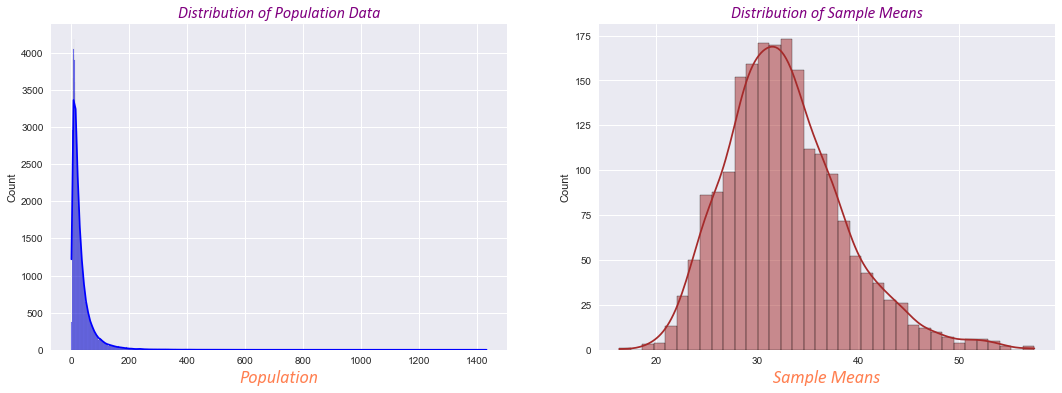

In [21]:
with plt.style.context('seaborn'):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data=pop_scores,ax=ax[0],color='blue',kde=True)
    sns.histplot(data=samp_distn_samp_means,ax=ax[1],color='brown',kde=True)
    ax[0].set_xlabel("Population",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[1].set_xlabel("Sample Means",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[0].set_title("Distribution of Population Data",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    ax[1].set_title("Distribution of Sample Means",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    plt.show()

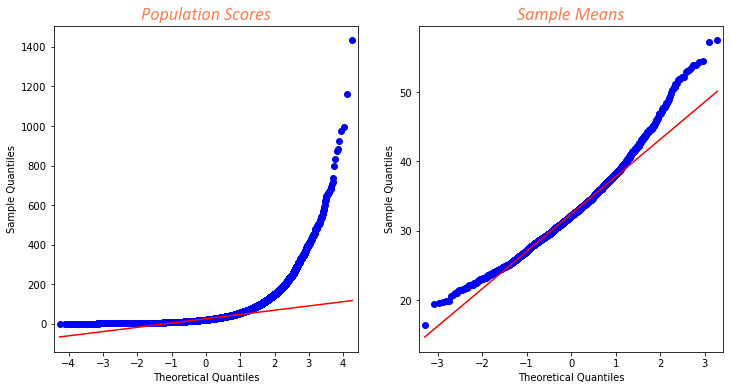

In [22]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    qqplot(data=np.array(pop_scores),line='q',ax=ax[0])   
    qqplot(data=np.array(samp_distn_samp_means),line='q',ax=ax[1])    
    ax[0].set_title("Population Scores",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[1].set_title("Sample Means",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})

#### **That's the beauty of CLT; even if the population is non-normal but the sampling distribution is done with sample size > 30 then distribution of sample means will be close to normal.**

- **This is quite evident in the above case.**

In [23]:
clt_c1_mean = np.mean(samp_distn_samp_means)
pop_mean= np.mean(pop_scores)
clt_c1_stddev = np.std(samp_distn_samp_means)*np.sqrt(sample_size)
pop_stddev = np.std(pop_scores)

#### **Let's try the CLT with less sample size**

#### **Small_Sample_Size**

In [24]:
sample_size2 = 5
number_of_samples2 = pop_scores.size/sample_size2
print("Number of samples to be withdrawn {} and Samples Size {}".format(number_of_samples2,sample_size2))

Number of samples to be withdrawn 20000.0 and Samples Size 5


In [25]:
samp_distn2, samp_distn_samp_means2 = clt(pop_scores, num_samples=number_of_samples2, samp_size=sample_size2)

In [26]:
len(samp_distn2), len(samp_distn_samp_means2)

(20000, 20000)

In [27]:
samp_distn2[0:5]

[array([ 9.77459789,  7.52488528, 51.03946338, 54.09055728, 43.62610905]),
 array([23.56108723, 23.64005921,  5.55045567, 16.22534037, 62.69130071]),
 array([18.39790481, 18.51982791, 83.33993255,  2.29671556,  6.69448429]),
 array([ 14.9598468 ,  13.76763453,   5.39245183, 134.13471829,
         23.61834668]),
 array([114.31958131,  81.12293582,  79.43827566,  10.35784115,
         14.92544111])]

In [28]:
samp_distn_samp_means2[0:5]

[33.211122578433915,
 26.333648639098648,
 25.849773024994267,
 38.37459962669683,
 60.03281501028192]

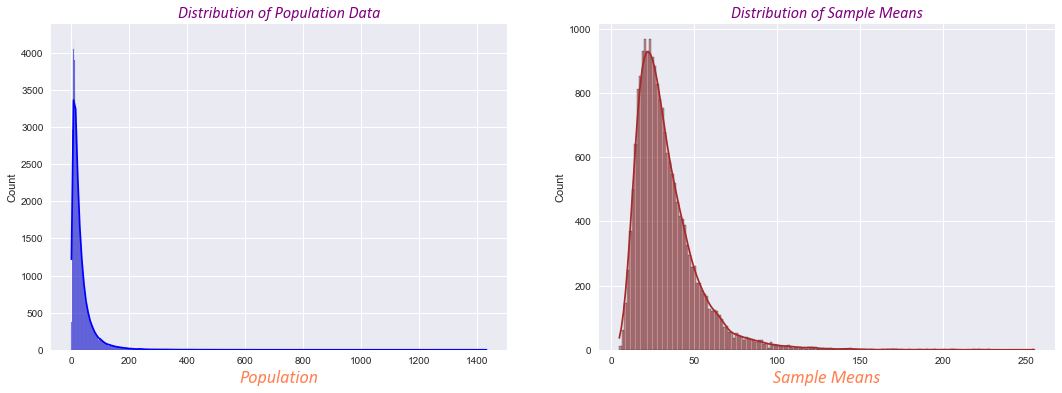

In [29]:
with plt.style.context('seaborn'):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data=pop_scores,ax=ax[0],color='blue',kde=True)
    sns.histplot(data=samp_distn_samp_means2,ax=ax[1],color='brown',kde=True)
    ax[0].set_xlabel("Population",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[1].set_xlabel("Sample Means",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[0].set_title("Distribution of Population Data",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    ax[1].set_title("Distribution of Sample Means",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    plt.show()

- **Here, the curve of sample means is much like a pareto distribution even after sampling distribution and it is due to smaller sample size.**

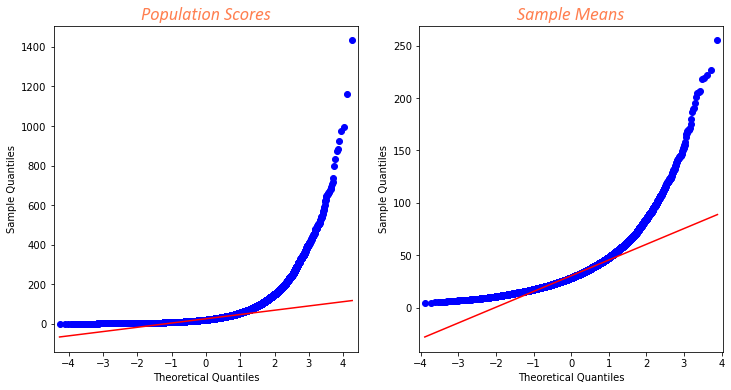

In [30]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    qqplot(data=np.array(pop_scores),line='q',ax=ax[0])   
    qqplot(data=np.array(samp_distn_samp_means2),line='q',ax=ax[1])    
    ax[0].set_title("Population Scores",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[1].set_title("Sample Means",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})

- **So, clearly no where close to normal distribution. Some amount of betterment we can say that has happened but overall it is a non-normal.**

In [31]:
clt_c2_mean = np.mean(samp_distn_samp_means2)
clt_c2_stddev = np.std(samp_distn_samp_means2)*np.sqrt(sample_size2)

In [32]:
# Calculating the differences of both the cases
mean_diff_big_samp_size = np.abs(clt_c1_mean - pop_mean)
mean_diff_small_samp_size = np.abs(clt_c2_mean - pop_mean)

stddev_diff_big_samp_size = np.abs(clt_c1_stddev - pop_stddev)
stddev_diff_small_samp_size = np.abs(clt_c2_stddev - pop_stddev)

print(colored("Larger sample size differences Mean: {:.3f} and Stddev: {:.3f}\n".format(mean_diff_big_samp_size,stddev_diff_big_samp_size),
                  "green"))
print(colored("Small sample size differences Mean: {:.3f} and Stddev: {:.3f}".format(mean_diff_small_samp_size,stddev_diff_small_samp_size),
             "red"))

Larger sample size differences Mean: 0.303 and Stddev: 1.343

Small sample size differences Mean: 0.031 and Stddev: 0.193


### **CASE:III**
#### **BOOTSTRAP_Simulation**

In [33]:
bootsample_means = []
for _ in range(10000):
    bootsample = np.random.choice(a=sample1,size=50,replace=True)
    bootsample_means.append(np.mean(bootsample))

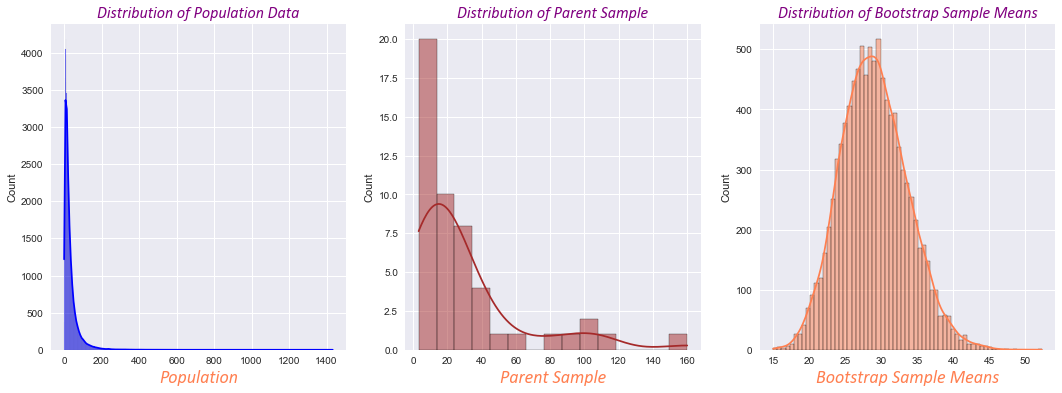

In [34]:
with plt.style.context('seaborn'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    sns.histplot(pop_scores,ax=ax[0],color='blue',kde=True)
    sns.histplot(sample1,ax=ax[1],color='brown',kde=True)
    sns.histplot(bootsample_means,ax=ax[2],color='coral',kde=True)
    ax[0].set_xlabel("Population",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[1].set_xlabel("Parent Sample",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[2].set_xlabel("Bootstrap Sample Means",fontdict={'size':18,'family':'calibri','color':'coral','style':'oblique'})
    ax[0].set_title("Distribution of Population Data",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    ax[1].set_title("Distribution of Parent Sample",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    ax[2].set_title("Distribution of Bootstrap Sample Means",fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'},
             loc='center')
    plt.show()

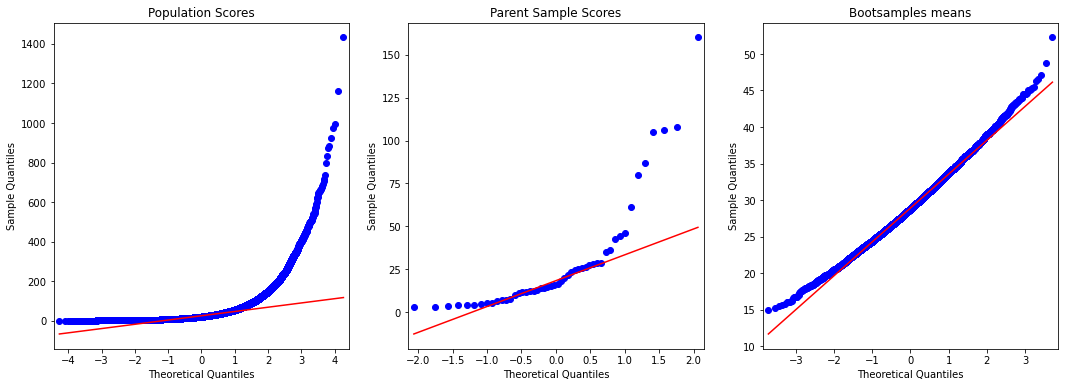

In [35]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    qqplot(data=np.array(pop_scores),line='q',ax=ax[0]);
    ax[0].set_title('Population Scores')
    
    qqplot(data=np.array(sample1),line='q',ax=ax[1]);
    ax[1].set_title('Parent Sample Scores')
    
    qqplot(data=np.array(bootsample_means),line='q',ax=ax[2]);
    ax[2].set_title('Bootsamples means')

### **Here, we saw that by using the computational power we can create a normally distributed data from a small size sample.**

In [36]:
## Mean of Bootsample means
np.mean(bootsample_means)

29.032896252129774

In [37]:
## Std Dev of Bootsamples Means
np.std(bootsample_means)

4.617613058705242

In [38]:
## True Mean v/s Simulated Mean
np.mean(pop_scores), np.mean(bootsample_means)

(33.06191014559588, 29.032896252129774)

In [39]:
## Theoretical Error v/s Simulated Std Error
np.std(pop_scores)/np.sqrt(40), np.std(bootsample_means)

(6.7450406326199195, 4.617613058705242)

### **P-value**

In [40]:
len(list(filter(lambda val : val > np.mean(sample1), bootsample_means)))/10000

0.4774

### **This means that 48% of the times the value of Simulated Sample mean is greater than the parent sample mean.**

#### **Forming the confidence intervals**

In [41]:
loc = 0.95
alpha_lower = np.round(((1-loc)/2.0)*100,2)
lower = np.percentile(bootsample_means,alpha_lower)

In [42]:
alpha_upper = np.round((loc+(alpha_lower)/100)*100,2)
upper = np.percentile(bootsample_means,alpha_upper)

In [43]:
print(alpha_lower,alpha_upper)

2.5 97.5


In [44]:
print("Confidence interval is ({},{})".format(np.round(lower,3),np.round(upper,3)))

Confidence interval is (20.59,38.706)


#### **Above is the percentile-method of finding the confidence intervals based on the value of loc(level of confidence) or alpha.**

#### **Below method to construct the C.I. is using Z-score table also referred as normal method.**

In [45]:
bt_moe = scipy.stats.norm.ppf(0.95) * (np.std(bootsample)/np.sqrt(50))

print("Confidence interval is ({},{})".format(np.round(np.mean(bootsample_means) - bt_moe,3), 
                                              np.round(np.mean(bootsample_means) + bt_moe,3)))

Confidence interval is (21.476,36.59)


### **``In the next section, we will work on statistically comparing different models trained for one problem using Bootstrapping. For this, we can also perform the ANOVA analysis by capturing their performance scores. Then, use pair-wise comparison.``**

### **``Similarly, we can also evaluate the best model performance on different metrics using Bootstrapping.``**

#### Refer video:
- https://www.youtube.com/watch?v=JmBwrYvKdtg
- https://analyticsindiamag.com/hands-on-guide-to-bootstrap-sampling-for-ml-performance-evaluation/
- https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

#### **Models_Comparison**

In [46]:
from sklearn import datasets

In [47]:
b_cancer = datasets.load_breast_cancer()
print(datasets.load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [48]:
b_cancer_df = pd.concat([pd.DataFrame(b_cancer.data,columns=b_cancer.feature_names),
                     pd.DataFrame(b_cancer.target,columns=['Label'])],axis=1)

In [49]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
b_cancer_df['Label'].value_counts()

1    357
0    212
Name: Label, dtype: int64

- **Usually, bootstrapping for evaluating the model performance is used at the end of machine learning analysis with an aim to quantify**
    - Statistically the performance of the classifier over a range of metrics. And,
    - How the model is behaving with the change in dataset?

- This means that I've already selected the best model.

- Let's assume that model is Random Forest Classifier. Now, I'll create different test datasets using Bootstrapping and fed in to RF to generate an array of the performance metric(or range of metrics) on simulated test data samples.

- The cool thing with this method is that we can compare the best classifier trained on different feature but with a same classification problem and compare them statistically.

### **The bootstrap confidence interval are the go to tools for POST ML Analysis.**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import pipeline

In [52]:
X = b_cancer_df.iloc[:,0:-1]
y = b_cancer_df['Label']

In [53]:
X.shape

(569, 30)

In [54]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.40, random_state=41)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

In [56]:
p = pipeline.make_pipeline(StandardScaler(), RFC())
p

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [57]:
p.fit(X=X_train,y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [58]:
X_train = StandardScaler().fit_transform(X=X_train)

#### **Model-1**
- **RFC**

In [59]:
rfc = RFC()

In [60]:
rfc_model = rfc.fit(X_train,y_train)

In [61]:
rfc_y_pred = rfc_model.predict(StandardScaler().fit_transform(X_test))
rfc_y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0])

In [62]:
np.array(y_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0])

In [63]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score as acc_scr

In [64]:
X_test_score = acc_scr(y_test,rfc_y_pred)
X_test_score

0.956140350877193

In [65]:
bt_tst_smpl_acc = []
X_test_ss = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=b_cancer.feature_names)
test_data = pd.concat([X_test_ss,y_test.reset_index(drop=True)],axis=1).values
for _ in range(8000):
    boot_testsample = resample(test_data,n_samples=50)
    mod_pred = rfc_model.predict(boot_testsample[:,:-1])
    score = acc_scr(boot_testsample[:,-1],mod_pred)
    bt_tst_smpl_acc.append(score)

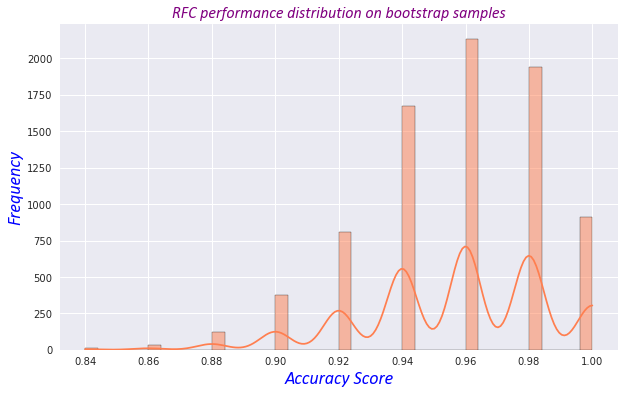

In [66]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,6))
    sns.histplot(data=bt_tst_smpl_acc,kde=True,color='coral')
    plt.title("RFC performance distribution on bootstrap samples",
              fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'})
    plt.xlabel("Accuracy Score",fontdict={'size':18,'family':'calibri','color':'blue','style':'oblique'})
    plt.ylabel("Frequency",fontdict={'size':18,'family':'calibri','color':'blue','style':'oblique'})

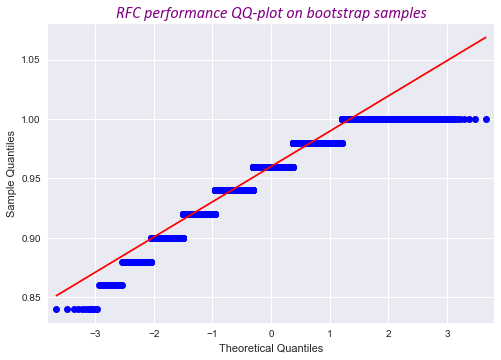

In [67]:
with plt.style.context('seaborn'):
    qqplot(np.array(bt_tst_smpl_acc),line='q')
    plt.title("RFC performance QQ-plot on bootstrap samples",
              fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'})
    plt.show()

In [68]:
np.mean(bt_tst_smpl_acc)

0.95665

### **P-value**

In [69]:
len(list(filter(lambda val : val > X_test_score, bt_tst_smpl_acc)))/8000

0.62325

#### **This means that 62% of the times the value of Simulated Sample mean is greater than the parent sample mean.**

#### **Forming the confidence intervals**

In [70]:
loc = 0.95
alpha_lower = np.round(((1-loc)/2.0)*100,2)
lower = np.percentile(bt_tst_smpl_acc,alpha_lower)

In [71]:
alpha_upper = np.round((loc+(alpha_lower)/100)*100,2)
upper = np.percentile(bt_tst_smpl_acc,alpha_upper)

In [72]:
print(alpha_lower,alpha_upper)

2.5 97.5


In [73]:
print("Confidence interval is ({},{})".format(np.round(lower,3),np.round(upper,3)))

Confidence interval is (0.9,1.0)


#### This means that we are 95% confident that RFC accuracy will fall between 90% to 100%.

#### **Above is the percentile-method of finding the confidence intervals based on the value of loc(level of confidence) or alpha.**

#### **Below method to construct the C.I. is using Z-score table also referred as normal method.**

In [74]:
bt_moe = scipy.stats.norm.ppf(0.95) * (np.std(bt_tst_smpl_acc)/np.sqrt(50))

print("Confidence interval is ({},{})".format(np.round(np.mean(bt_tst_smpl_acc) - bt_moe,3), 
                                              np.round(np.mean(bt_tst_smpl_acc) + bt_moe,3)))

Confidence interval is (0.95,0.963)


#### This means that we are 95% confident that RFC accuracy will fall between 95% to 96% using normal method.

#### **Model-2**
- **KNN**

In [75]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn_model = knn.fit(X_train,y_train)

In [76]:
bt_tst_smpl_acc2 = []
for _ in range(8000):
    boot_testsample = resample(test_data,n_samples=50)
    mod2_pred = knn_model.predict(boot_testsample[:,:-1])
    score = acc_scr(boot_testsample[:,-1],mod2_pred)
    bt_tst_smpl_acc2.append(score)

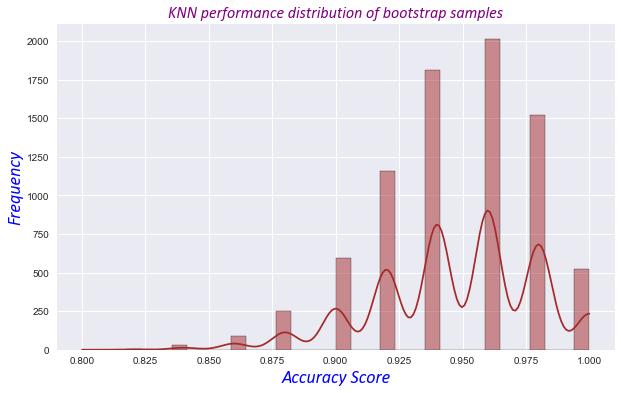

In [77]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,6))
    sns.histplot(data=bt_tst_smpl_acc2,color='brown',kde=True);
    plt.title("KNN performance distribution of bootstrap samples",
              fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'})
    plt.xlabel("Accuracy Score",fontdict={'size':18,'family':'calibri','color':'blue','style':'oblique'})
    plt.ylabel("Frequency",fontdict={'size':18,'family':'calibri','color':'blue','style':'oblique'})
    plt.show()

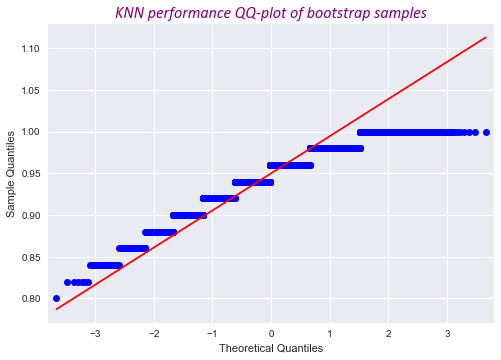

In [78]:
with plt.style.context('seaborn'):
    qqplot(np.array(bt_tst_smpl_acc2),line='q')
    plt.title("KNN performance QQ-plot of bootstrap samples",
              fontdict={'size':16,'family':'calibri','color':'purple','style':'oblique'})
    plt.show()

In [79]:
np.mean(bt_tst_smpl_acc2)

0.9474175

### **P-value**

In [80]:
len(list(filter(lambda val : val > X_test_score, bt_tst_smpl_acc2)))/8000

0.50725

#### **This means that 50% of the times the value of Simulated Sample mean is greater than the parent sample mean.**

#### **Forming the confidence intervals**

In [81]:
loc = 0.95
alpha_lower = np.round(((1-loc)/2.0)*100,2)
lower = np.percentile(bt_tst_smpl_acc2,alpha_lower)

In [82]:
alpha_upper = np.round((loc+(alpha_lower)/100)*100,2)
upper = np.percentile(bt_tst_smpl_acc2,alpha_upper)

In [83]:
print(alpha_lower,alpha_upper)

2.5 97.5


In [84]:
print("Confidence interval is ({},{})".format(np.round(lower,3),np.round(upper,3)))

Confidence interval is (0.88,1.0)


#### This means that we are 95% confident that RFC accuracy will fall between 88% to 100% using percentile method.

#### **Above is the percentile-method of finding the confidence intervals based on the value of loc(level of confidence) or alpha.**

#### **Below method to construct the C.I. is using Z-score table also referred as normal method.**

In [85]:
bt_moe = scipy.stats.norm.ppf(0.95) * (np.std(bt_tst_smpl_acc2)/np.sqrt(50))

print("Confidence interval is ({},{})".format(np.round(np.mean(bt_tst_smpl_acc2) - bt_moe,3), 
                                              np.round(np.mean(bt_tst_smpl_acc2) + bt_moe,3)))

Confidence interval is (0.94,0.955)


#### This means that we are 95% confident that RFC accuracy will fall between 94% to 95% using normal method.

## **`Conclusion`**
### **The values of both the models are very close in terms of performance comparison with RFC has a slight upper hand or we can say that they are behaving nearly same on this dataset.**